In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import csv
from utils import mnist_reader
from utils.data_load import load
import codes
# Load matplotlib images inline
%matplotlib inline
# These are important for reloading any code you write in external .py files.
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Section #1.1: Linear Regression
Please follow our instructions in the same order to solve the linear regresssion problem.

Please print out the entire results and codes when completed.

In [13]:
def get_data():
    """
    Load the dataset from disk and perform preprocessing to prepare it for the linear regression problem.   
    """
    X_train, y_train = load('./data/regression/regression_train.csv')
    X_test, y_test = load('./data/regression/regression_test.csv')
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test= get_data()  


print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)

Train data shape:  (30, 1)
Train target shape:  (30,)
Test data shape:  (30, 1)
Test target shape:  (30,)


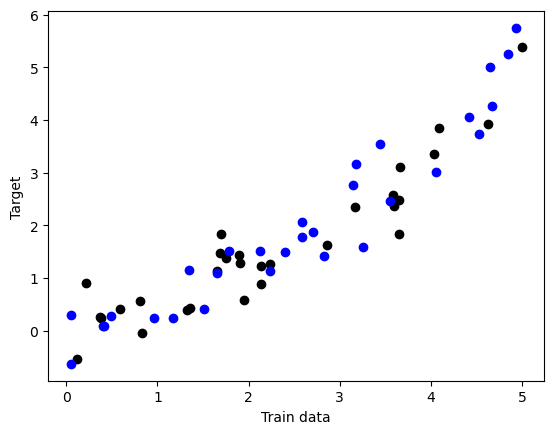

In [14]:
## PART (a): 
## Plot the training and test data ##

plt.plot(X_train, y_train,'o', color='black')
plt.plot(X_test, y_test,'o', color='blue')
plt.xlabel('Train data')
plt.ylabel('Target')
plt.show()

## Answer of part(a)
According to this plot, we think it is a dataset generated by a linear function plus some noises. 

Therefore we think a linear function could perform well.

## Training Linear Regression
In the following cells, you will build a linear regression. You will implement its loss function, then subsequently train it with gradient descent. You will choose the learning rate of gradient descent to optimize its classification performance. Finally, you will get the opimal solution using closed form expression.

In [15]:
from codes.Regression import Regression

In [16]:
## PART (d): 
## Complete loss_and_grad function in Regression.py file and test your results.
regression = Regression(m=1, reg_param=0)
loss, grad = regression.loss_and_grad(X_train,y_train)
print('Loss value',loss)
print('Gradient value',grad)
##

Loss value 4.282380633012861
Gradient value [[ -3.19217252]
 [-10.44504584]]


## Answer of part(d):
The loss value is about 4.28.

The gradient is vector [-3.19~, -10.44~].

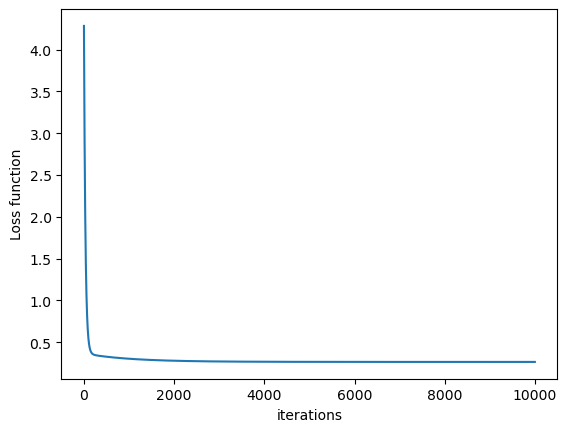

[[-0.37469204]
 [ 0.88377017]]
Final loss: 0.2641846537670642


In [17]:
## PART (e): 
## Complete train_LR function in Regression.py file 
my_loss_history, w = regression.train_LR(X_train,y_train, eta=1e-3,batch_size=30, num_iters=10000)
plt.plot(my_loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
print(w)
print('Final loss:',my_loss_history[-1])

[0.4010980949465977, 0.38317124787831125, 0.38588178888000224, 0.38886212376210727, 0.3857999217014244, 0.38546472178456076]
The best batch size is 5 the best test error is 0.38317124787831125
The best learning rate for best batch size is 0.001 the best final loss is 0.11181510274119938


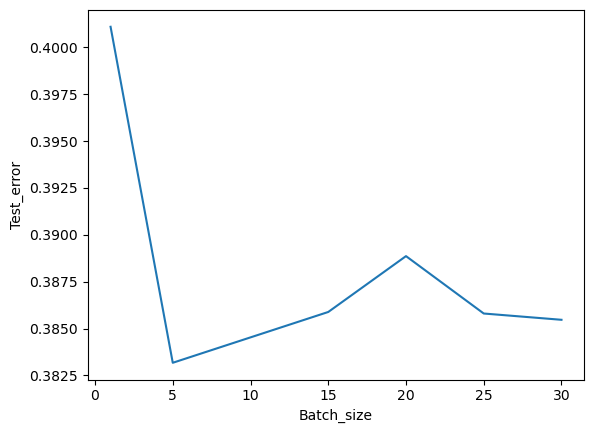

In [26]:
## PART (e) (Different Batch Sizes):
Batch = [1, 5, 15, 20, 25, 30]
Test_err = []
best_batch = 0
best_test_err = 100
# ================================================================ #
# YOUR CODE HERE:
# Train the Logistic regression for different batch size Avergae the test error over 10 times
# ================================================================ #
regression = Regression(m=1, reg_param=0)
for batch in Batch:
    avg_err = 0
    for i in range(10):
        loss_history, w = regression.train_LR(X_train,y_train, eta=1e-3,batch_size=batch, num_iters=10000)
        y_pred = regression.predict(X_test)
        N = X_test.shape[0]
        y_test = np.reshape(y_test,(N,1))
        err = np.sum( np.square(y_pred - y_test) ) / N
        avg_err+=err
    test = avg_err / 10
    Test_err.append(test)
    if test < best_test_err:
        best_test_err = test
        best_batch = batch
print(Test_err)
print('The best batch size is', best_batch,'the best test error is', best_test_err)

learning_rate = [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1]
best_final_loss = 100
best_lr = 100
for lr in learning_rate:
    loss_history, w = regression.train_LR(X_train,y_train, eta=lr,batch_size=best_batch, num_iters=10000)
    final_loss = loss_history[-1]
    if final_loss < best_final_loss:
                best_final_loss = final_loss
                best_lr = lr
print('The best learning rate for best batch size is', best_lr, 'the best final loss is', best_final_loss)
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
fig = plt.figure()
plt.plot(Batch,Test_err)
plt.xlabel('Batch_size')
plt.ylabel('Test_error')
plt.show()
fig.savefig('./plots/LR_Batch_test.pdf')

## Answer of part(e)
We tested batch size ranged from [1, 5, 15, 20, 25, 30], we found the best batch size is 5 with the testing loss is 0.383.

Then we use batch size = 5, and test learning rate from [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1], then we found out the best learning rate is 0.001, with the final loss is 0.111.

In [19]:
## PART (f): 
## Complete closed_form function in Regression.py file
loss_2, w_2 = regression.closed_form(X_train, y_train)
print('Optimal solution loss',loss_2)
print('Optimal solution gradient',w_2)

Optimal solution loss 0.26417938203964436
Optimal solution gradient [[-0.37906992]
 [ 0.8852483 ]]


## Answer of part(f):
We get the loss and gradient of closed form: loss = 0.264~, gradient = [-0.379~, 0.885~].

The results of closed form is very close to the results we get by using numerical solution (Gradient Descent) which is loss = 0.264~, gradient = [-0.374~, 0.884~].

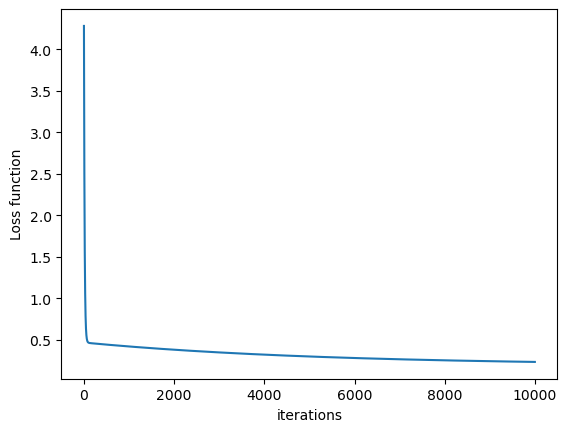

[[0.05494868]
 [0.08469512]
 [0.11655802]
 [0.01527028]]
Final loss when m = 3: 0.23341198948483843


In [21]:
## PART (g): Polynomial regression
regression = Regression(m=3, reg_param=0)
my_loss_history, w = regression.train_LR(X_train,y_train, eta=1e-5,batch_size=30, num_iters=10000)
plt.plot(my_loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
print(w)
print('Final loss when m = 3:',my_loss_history[-1])

## Answer of part(g):
We finish the polynomial regression and test on m = 3.

The loss when m = 3 is about 0.233~, which is slightly better than m = 1. And the gradient is [0.0549~, 0.0846~, 0.116~, 0.0152~].

[[0.26417938]
 [0.18253787]
 [0.15938695]
 [0.15893654]
 [0.15829698]
 [0.15824521]
 [0.13330658]
 [0.12905253]
 [0.11292506]
 [0.1074876 ]]

[[0.38546511]
 [0.25101632]
 [0.22269398]
 [0.21710013]
 [0.22448356]
 [0.2266377 ]
 [0.32538753]
 [0.3241488 ]
 [0.46651551]
 [0.63156399]]
When degree is 3, the training loss is [0.15938695] , the testing loss is [0.22269398]
The best polynomial on training data is 10
The best training loss of best_poly is [0.1074876]
The best polynomial on training and testing data is 4
The best training loss of best_avg_poly is [0.15893654]
The best testing loss of best_avg_poly is [0.21710013]


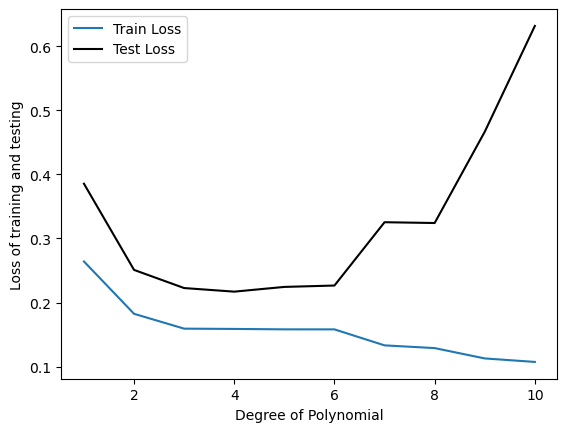

In [28]:
## PART (h) Overfitting
train_loss=np.zeros((10,1))
test_loss=np.zeros((10,1))
best_poly = -1
best_avg_poly = -1
best_loss = 100
best_avg_loss = 100
N2,d2 = X_test.shape
for m in range(10):
    # print('m is', ms)
    regression = Regression(m=m+1, reg_param=0)
    loss_m, w_m = regression.closed_form(X_train, y_train)
    train_loss[m]= loss_m

    if loss_m < best_loss:
        best_loss = loss_m
        best_poly = m+1

    y_test_reshape = np.reshape(y_test, (N2,d2))
    y_test_pred = regression.predict(X_test)
    test_loss[m]= (1/N2)*np.sum(np.square(y_test_reshape-y_test_pred))

    avg = np.mean(train_loss[m] + test_loss[m])
    if avg < best_avg_loss:
        best_avg_loss = avg
        best_avg_poly = m+1


print(train_loss)
print(  )
print(test_loss)
print('When degree is 3, the training loss is', train_loss[2], ', the testing loss is', test_loss[2])
print('The best polynomial on training data is', best_poly)
print('The best training loss of best_poly is', train_loss[best_poly-1])
print('The best polynomial on training and testing data is', best_avg_poly)
print('The best training loss of best_avg_poly is', train_loss[best_avg_poly-1])
print('The best testing loss of best_avg_poly is', test_loss[best_avg_poly-1])
y = range(1,11,1)

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
plt.plot(y, train_loss, label = 'Train Loss')
plt.plot(y, test_loss, color='black', label = 'Test Loss')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Loss of training and testing')
plt.legend()
plt.show()

## Answer of part(h)
According to the best training loss, our best model is with degree of 10. But it is clearly that the model with degree of 10 is overfitting seriously. The plot above showed that the training loss of 10 is very low but the testing loss is very high which implies overfitting.

This plot clearly showed that with too simple model, it is underfitting with training and testing loss both too high. And with too complex model, it is overfitting with very low training loss but too high testing loss.

We calculated the average loss of training and testing loss and find the best degree of polynomial is 4.

The according training loss is 0.15893654 and the according testing loss is 0.21710013.

The best lambda is 1e-08 with best testing loss 0.27191611411493943


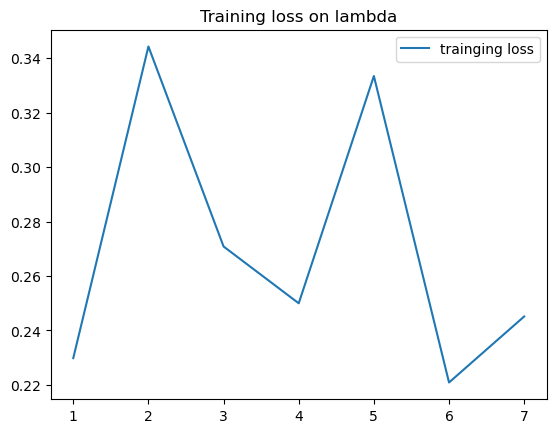

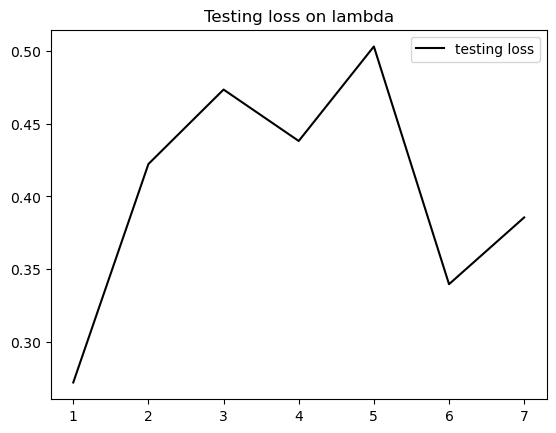

In [29]:
#PART (j): 
lam = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
train_loss=np.zeros((len(lam),1))
test_loss=np.zeros((len(lam),1))
batch_size =10
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# by taking average on 10 runs per lambda value
# ================================================================ #
best_test_loss = 100
best_lam = 0
for reg in range(len(lam)):
    regression = Regression(m = 3, reg_param = lam[reg])
    X_aug_train = regression.gen_poly_features(X_train)
    X_aug_test = regression.gen_poly_features(X_test)
    train_err = 0
    test_err = 0
    N1,d1 = X_train.shape
    N2,d2 = X_test.shape
    for i in range(10):
        loss_hist, w_reg = regression.train_LR(X_train, y_train, eta=5e-4, batch_size=10, num_iters=5000)
        y_train_pred = np.dot(X_aug_train, w_reg)
        train_err+= (1/N1) * np.sum(np.square(y_train_pred - np.reshape(y_train, (N1,d1))))

        y_test_reshape = np.reshape(y_test, (N2,d2))
        y_test_pred = np.dot(X_aug_test, w_reg)
        test_err+= (1/N2) * np.sum(np.square(y_test_reshape-y_test_pred))
    train_err/=10
    test_err/=10
    train_loss[reg] = train_err
    test_loss[reg] = test_err
    if test_err < best_test_loss:
        best_test_loss = test_err
        best_lam = reg
        
y = range(1,8,1)
print('The best lambda is', lam[best_lam], 'with best testing loss', best_test_loss)
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
plt.figure()
plt.plot(y,train_loss,label = 'trainging loss')
plt.title('Training loss on lambda')
plt.legend()
plt.show()

plt.figure()
plt.plot(y,test_loss, color='black', label = 'testing loss')
plt.legend()
plt.title('Testing loss on lambda')
plt.show()

## Answer of part(j):
We test different regularization parameters: [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]

The best param we find is 1e-8 and the testing loss is about 0.271.

# Section #1.2: Binary Classification

Please follow our instructions in the same order to solve the binary classification problem.
Please print out the entire results and codes when completed.

In [30]:
#X_train, y_train = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='train')
#X_test, y_test = mnist_reader.load_mnist('fashion-mnist/data/fashion', kind='t10k')

X_train = np.load('./data/binary_classification/X_train.npy')
y_train = np.load('./data/binary_classification/y_train.npy')
X_test = np.load('./data/binary_classification/X_test.npy')
y_test = np.load('./data/binary_classification/y_test.npy')

print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)

Train data shape:  (5000, 784)
Train target shape:  (5000, 1)
Test data shape:  (500, 784)
Test target shape:  (500, 1)


In [ ]:
# PART (a): 
# To Visualize a point in the dataset
index = 11
X = np.array(X_train[index], dtype='uint8')
X = X.reshape((28, 28))
fig = plt.figure()
plt.imshow(X, cmap='gray')
plt.show()
if y_train[index] == 1:
    label = 'Dress'
else:
    label = 'Shirt'
print('label is', label)

## Answer of part(a)
X_train dimension: [5000, 784]

X_test dimension: [500, 784]

## Train Perceptron
In the following cells, you will build Perceptron Algorithm.

The last value of loss history: 0.0
The squared l2 norm value of the weight: 659979038983.0001


Text(0.5, 1.0, 'The loss history of Perceptron Algorithm')

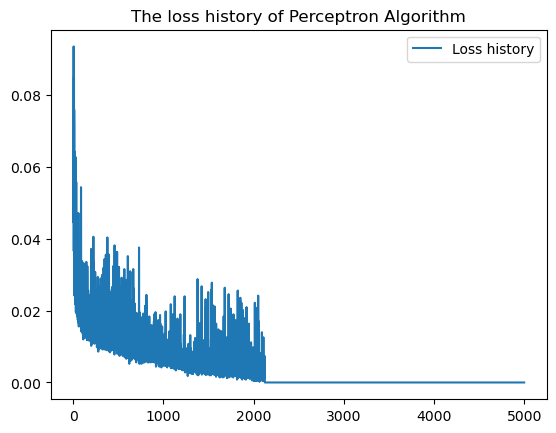

In [31]:
# PART (b),(c): 
# Implement the perceptron Algorithm and compute the number of mis-classified points
N = X_train.shape[0] # Number of data point train
N_test = X_test.shape[0] # Number of data point test
d = X_train.shape[1] # Number of features
loss_hist = []
W = np.zeros((d+1,1))
X_train_h = np.hstack((np.ones((N,1)), X_train))
X_test_h = np.hstack((np.ones((N_test,1)), X_test))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test accuracy in the same plot
# for m range from 1 to N
# ================================================================ #
for i in range(N):
    mis_per = 0
    for j in range(N):
        train_point = X_train_h[j]
        train_label = y_train[j]
        h = np.dot(train_point, W)
        if h * train_label <= 0:
            W+= train_label * train_point.reshape(-1,1)
    y_pred = np.int_(np.sign(np.dot(X_train_h,W)))
    mis_per = np.count_nonzero(y_pred - y_train) / N
    loss_hist.append(mis_per)
print('The last value of loss history:', loss_hist[-1])
l2_norm_val = (np.linalg.norm(W,ord=2)**2)
print('The squared l2 norm value of the weight:', l2_norm_val)

plt.figure()
plt.plot(loss_hist, label = 'Loss history')
plt.legend()
plt.title('The loss history of Perceptron Algorithm')
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

## Answer of part(b)
The last value of the loss function is 0.0

The squared norm of W is 812390.9397469916

The last misclassification is 0.0 so it could converge which implies that this dataset is linearly separable.

In [32]:
## PART(c)
## Calculate the misclassification percentage of testing points
y_test_pred =  np.int_(np.sign(np.dot(X_test_h,W)))
mis_per_test = np.count_nonzero(y_test_pred - y_test) / N
print("The percentage of misclassified points in the test data is", mis_per_test)

The percentage of misclassified points in the test data is 0.009


## Answer of part(c):
The percentage of misclassification on test set is 0.9%.

## Train Logistic Regression
In the following cells, you will build a logistic regression. You will implement its loss function, then subsequently train it with gradient descent.

In [33]:
from codes.Logistic import Logistic

In [34]:
## PART (f): 
X_train = np.load('./data/binary_classification/X_train.npy')
y_train = np.load('./data/binary_classification/y_train.npy')
X_test = np.load('./data/binary_classification/X_test.npy')
y_test = np.load('./data/binary_classification/y_test.npy')
## Complete loss_and_grad function in Logistic.py file and test your results.
N,d = X_train.shape
logistic = Logistic(d=d, reg_param=0)
loss, grad = logistic.loss_and_grad(X_train,y_train)
print('Loss function=',loss)
print(np.linalg.norm(grad,ord=2)**2)

Loss function= 0.6931471805599454
188442.90860327004


## Answer of part(f):
The loss is 0.693~.

The Frobenius norm of w is about 188442.9~

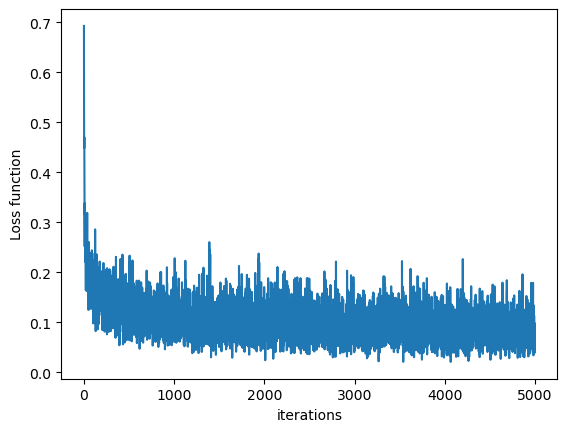

Weight squared norm 0.0002852379284381107
Final loss 0.06647200567712908


In [35]:
## PART (g):
## Complete train_LR function in Logisitc.py file
loss_history, w = logistic.train_LR(X_train,y_train, eta=1e-6,batch_size=100, num_iters=5000)
fig = plt.figure()
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
fig.savefig('./plots/LR_loss_hist.pdf')
print('Weight squared norm',np.linalg.norm(w,ord=2)**2)
print('Final loss',loss_history[-1])

## Answer of part(g):
The final loss is about 0.0664~.

The Frobenius norm of w is about 0.000285~.

In [36]:
# PART (h)
# Complete predict function in Logisitc.py file and compute the percentage of mis-classified points
y_pred = logistic.predict(X_test)
test_err = np.sum((y_test!=y_pred))*100/X_test.shape[0]
print(test_err,'%')

4.8 %


## Answer of part(h):
The percentage of misclassification on test set is 4.8%.

/Users/yiwenzhang/Desktop/PROJECT-1/codes/Logistic.py:61: RuntimeWarning: overflow encountered in exp
  grad = (1/N) *((1/(1+np.exp(-h)).T - y.T)@X_aug).T


The best batch size is 50 the best test error is [0.0642]


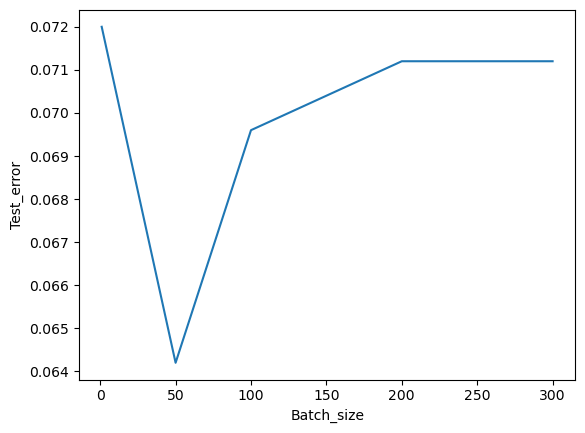

In [40]:
## PART (i): 
Batch = [1, 50 , 100, 200, 300]
test_err = np.zeros((len(Batch),1))
# ================================================================ #
# YOUR CODE HERE:
# Train the Logistic regression for different batch size. Avergae the test error over 10 times
# ================================================================ #
for i in range(len(Batch)):
    batch_size = Batch[i]
    test_error = 0
    num_iters = int(6000 / batch_size)
    for j in range(10):
        loss_history, w = logistic.train_LR(X_train,y_train, eta=1e-5,batch_size=batch_size, num_iters=num_iters)
        y_test_pred = logistic.predict(X_test)
        test_error += np.sum((y_test!=y_test_pred))/X_test.shape[0]
        # print(test_error)
    test_error/=10
    test_err[i] = test_error

min_idx = np.argmin(test_err)
best_batchsize = Batch[min_idx]
best_test_err = min(test_err)
print('The best batch size is', best_batchsize,'the best test error is', best_test_err)
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
fig = plt.figure()
plt.plot(Batch,test_err)
plt.xlabel('Batch_size')
plt.ylabel('Test_error')
plt.show()
fig.savefig('./plots/LR_Batch_test.pdf')

## Answer of part(i)
The batch size of 50 gives out the best result: testing err is 6.42%

## Train SVM
In the following cells, you will build SVM. You will implement its loss function, then subsequently train it with mini-batch gradient descent. You will choose the learning rate of gradient descent to optimize its classification performance. Finally, you will get the best regularization parameter.

In [41]:
from codes.SVM import SVM

In [42]:
## PART (l): 
## Complete loss_and_grad function in Logistic.py file and test your results.
N,d = X_train.shape
svm = SVM(d=d, reg_param=0)
loss, grad = svm.loss_and_grad(X_train,y_train)
print('Loss function=',loss)
print(np.linalg.norm(grad,ord=2)**2)

Loss function= 1.0
753771.6344130802


## Answer of part(l):
The loss is 1.0.
The Frobenius norm of w is about 753771.~

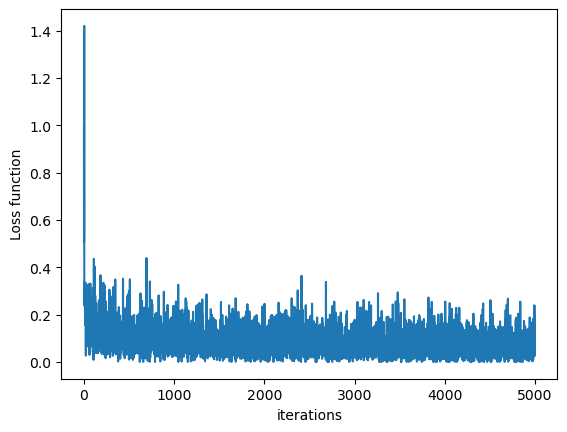

0.00026929379564440007
0.16983518000000017


In [43]:
## PART (m): 
## Complete train_svm function in SVM.py file 
loss_history, w = svm.train_svm(X_train,y_train, eta=1e-6,batch_size=50, num_iters=5000)
fig = plt.figure()
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
fig.savefig('./plots/svm_loss_hist.pdf')
print(np.linalg.norm(w,ord=2)**2)
print(loss_history[-1])

## Answer of part(m)
The final loss is 0.169.

The Frobenius norm of grad is 0.000269.

In [44]:
# PART (n): 
# Complete predict function in SVM.py file and compute the percentage of mis-classified points
y_pred = svm.predict(X_test)
test_err = np.mean(y_pred != (y_test > 0)) * 100
print('{:.3f}'.format(test_err),'%')

6.000 %


## Answer of part(n)
The percentage of misclassification on test set is 6.00%

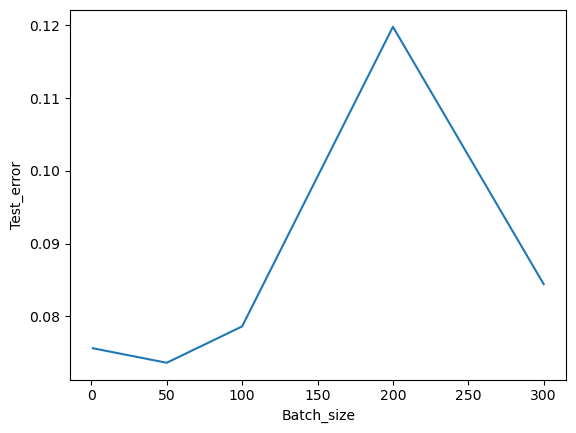

In [49]:
# PART (o) 
Batch = [1, 50 , 100,200, 300]
test_err = np.zeros((len(Batch),1))
# ================================================================ #
# YOUR CODE HERE:
# Train the SVM for different batch size Avergae the test error over 10 times
# ================================================================ #
for i in range(len(Batch)):
    batch_size = Batch[i]
    test_error = 0
    num_iters = int(6000 / batch_size)
    for j in range(10):
        svm = SVM(d=d, reg_param=0)
        loss_history, w = svm.train_svm(X_train,y_train, eta=1e-5,batch_size=batch_size, num_iters=num_iters)
        y_test_pred = svm.predict(X_test)
        err = 1 - np.mean(svm.predict(X_test) == (y_test > 0))
        test_err[i] += 0.1*err

fig = plt.figure()
plt.plot(Batch,test_err)
plt.xlabel('Batch_size')
plt.ylabel('Test_error')
plt.show()
fig.savefig('./plots/svm_Batch_test.pdf')

In [50]:
best_err = min(test_err)
idx = np.argmin(test_err)
best_batch = Batch[idx]
print('The best batch size is:', best_batch, 'with the best testing err,', best_err)

The best batch size is: 50 with the best testing err, [0.0736]


## Answer of part(o):
We found that the best batch size here is 50. 

The corresponding test error is 7.36%

## Train Kernelized SVM
In the following cells, you will build a RBF-SVM. You will use sklearn.svm.SVC package and its functions to train a RBF SVM. You will try to select a regularization parameter C and compare your results with non-kernelized SVM. 

In [51]:
# PART (p)
from sklearn.svm import SVC

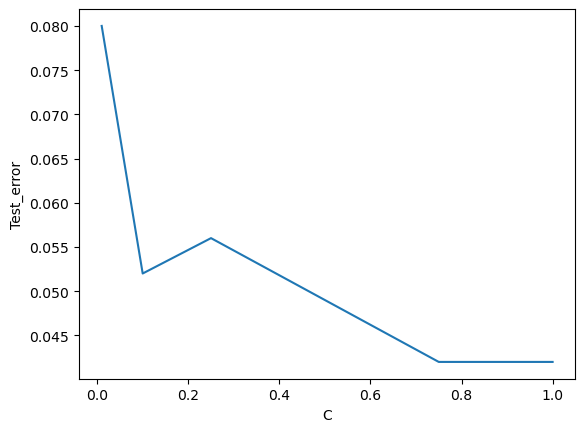

In [52]:
C_range = [0.01,0.1, 0.25, 0.75, 1] # inverse regularization parameter
test_err = np.zeros((len(C_range),1))
# Notes about sklearn.SVM
# example definition of SVM classifier: clf = SVC (kernel='rbf', C = C)
# Use clf.fit (X_train, y_train.ravel()) to train the model
# Use 2*(clf.decision_function(X_test)>0)-1 to get the classification decisions (y_pred)
# ================================================================ #
# YOUR CODE HERE:
# Train the kernelized SVM for different C
# ================================================================ #
for i in range(len(C_range)):
    myc = C_range[i]
    myclf = SVC(kernel='rbf', C = myc)
    myclf.fit(X_train, y_train.ravel())
    acc = myclf.score(X_test,y_test)
    test_err[i] = 1 - acc
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
fig = plt.figure()
plt.plot(C_range,test_err)
plt.xlabel('C')
plt.ylabel('Test_error')
plt.show()
fig.savefig('./plots/svm_C_test.pdf')

In [53]:
best_err = min(test_err)
idx = np.argmin(test_err)
best_C = C_range[idx]
print('The best C is:', best_C, 'with the best testing err,', best_err)

The best C is: 0.75 with the best testing err, [0.042]


## Answer of part(p)

The best C for kernelized SVM is 0.75 and the according testing error is 4.2%.

The performance of kernelized SVM is better than unkernelized SVM generally.

# Section #1.3: Multi-Class Logistic Regression and Adaboost

Please follow our instructions in the same order to solve the linear regresssion problem.
Please print out the entire results and codes when completed.

In [2]:
X_train, y_train = mnist_reader.load_mnist('./data/fashion-mnist', kind='train')
X_test, y_test = mnist_reader.load_mnist('./data/fashion-mnist', kind='t10k')
print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)
label = {0:'T-shirt/Top',1:'Trouser',2:'Pullover',3:'Dress',4:'Coat',5:'Sandal',6:'Shirt',7:'Sneaker',8:'Bag',9:'Ankle boot'}

Train data shape:  (60000, 784)
Train target shape:  (60000,)
Test data shape:  (10000, 784)
Test target shape:  (10000,)


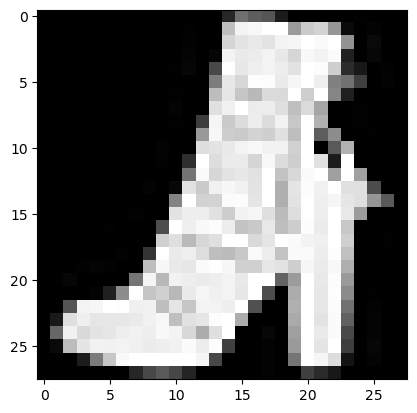

label is Ankle boot


In [3]:
# PART (a) 
# To Visualize a point in the dataset
index = 11
X = np.array(X_train[index], dtype='uint8')
X = X.reshape((28, 28))
fig = plt.figure()
plt.imshow(X, cmap='gray')
plt.show()
fig.savefig('./plots/Sample.pdf')
print('label is', label[y_train[index]])

## Answer of part(a)
The dimension of X_train and X_test is 60000 x 784 and 10000 x 784

## Train Multi-Class Logistic Regression

In the following cells, you will build a Multi-Class logistic regression. You will implement its loss function, then subsequently train it with gradient descent. You will implement L1 norm regularization, and choose the best regularization parameter.

In [16]:
from codes.MLogistic import MLogistic

In [6]:
## PART (d)
## Complete loss_and_grad function in Logistic.py file and test your results.
num_classes = len(np.unique(y_train))
num_features = X_train.shape[1]

logistic = MLogistic(dim=[num_classes,num_features], reg_param=0)
loss, grad = logistic.loss_and_grad(X_train[:5000],y_train[:5000])
print('Loss function=',loss)
print('Frobenius norm of grad=',np.linalg.norm(grad))
##

Loss function= 2.3025850929940463
Frobenius norm of grad= 424.07889418407046


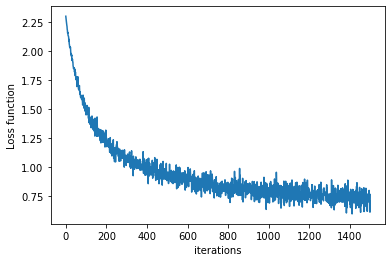

0.01122956070669866
0.7088758061416439


In [50]:
## PART (e): 
## Complete train_LR function in Logistic.py file 
loss_history, w = logistic.train_LR(X_train,y_train, eta=1e-7,batch_size=200, num_iters=1500)
fig = plt.figure()
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
fig.savefig('./plots/loss_hist.pdf')
print(np.linalg.norm(w))
print(loss_history[-1])

## Answer of part(e)
The final value of the loss function is .709.

The final value of the square Frobenius Norm is .011.

In [51]:
## PART (f): 
## Complete predict function in Logistic.py file and compute the trainin error and the test error

y_train_pred = logistic.predict(X_train)
print('training error:', 1-np.mean(np.equal(y_train,y_train_pred)))
y_test_pred = logistic.predict(X_test)
print('test error:',1-np.mean(np.equal(y_test, y_test_pred)))

training error: 0.23098333333333332
test error: 0.24409999999999998


## Answer of part(f)
Percentage of misclassfied points is 24.4%

Part i
For reg param 0, the test error is [0.2172].
For reg param 1e-06, the test error is [0.2157].
For reg param 0.001, the test error is [0.2167].
For reg param 0.01, the test error is [0.2179].
For reg param 0.1, the test error is [0.2181].
For reg param 1, the test error is [0.2549].
The best parameter seems to be 1e-06
Part i end
Part ii
Average validation error for reg of 0, is [0.20395]
Average validation error for reg of 1e-06, is [0.20313333]
Average validation error for reg of 0.001, is [0.20418333]
Average validation error for reg of 0.01, is [0.20411667]
Average validation error for reg of 0.1, is [0.20658333]
Average validation error for reg of 1, is [0.24258333]
The best parameter in this case was 1e-06, which yields a test error of:
0.21609999999999996
Part ii end


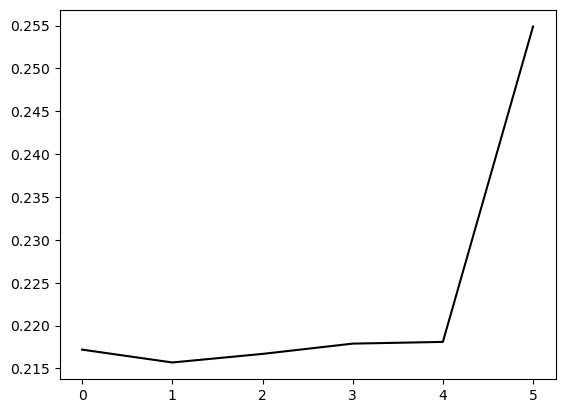

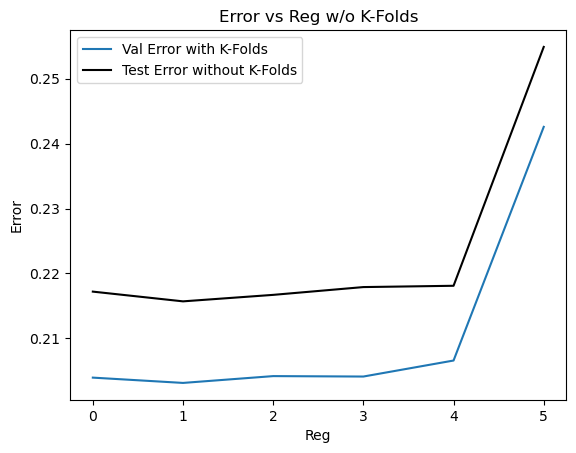

In [17]:
## PART (h): 
reg = [0,1e-6,1e-3,1e-2,1e-1,1]
train_err =np.zeros((len(reg),1))
test_err =np.zeros((len(reg),1))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training and test loss in the same plot
# for m range from 1 to 10
# ================================================================ #
#i
print("Part i")
for i in range(len(reg)):
    r = reg[i]
    logistic = MLogistic(dim = [num_classes, num_features], reg_param = r)
    _, _ = logistic.train_LR(X_train, y_train, eta = 1e-7, batch_size = 200, num_iters = 3000)
    
    y_train_pred = logistic.predict(X_train)
    train_err[i] = (1-np.mean(np.equal(y_train, y_train_pred)))
    y_test_pred = logistic.predict(X_test)
    test_err[i] = (1-np.mean(np.equal(y_test, y_test_pred)))
    print("For reg param "+str(reg[i])+", the test error is "+str(test_err[i])+".")
best_param1 = reg[np.argmin(test_err)]
print("The best parameter seems to be "+str(best_param1))
print("Part i end")
#ii
print("Part ii")
val_err = np.zeros((len(reg),1))
for i in range(len(reg)):
    r = reg[i]
    
    perm = np.random.permutation(X_train.shape[0])
    X_train_shuffled = X_train[perm]
    y_train_shuffled = y_train[perm]
    
    
    X_folds = np.split(X_train_shuffled, 5)
    y_folds = np.split(y_train_shuffled, 5)
    
    flds = np.arange(5)
    for k in flds:   
        bef = flds[:k]
        aft = flds[k+1:]
        fold_idx = np.concatenate((bef, aft))

        X_val_fold = X_folds[k]
        y_val_fold = y_folds[k]
        X_train_folds = [X_folds[j] for j in fold_idx]
        X_train_folds = np.concatenate(X_train_folds, axis = 0)  
        y_train_folds = [y_folds[j] for j in fold_idx]
        y_train_folds = np.concatenate(y_train_folds, axis = 0)
        
        logistic = MLogistic(dim = [num_classes, num_features], reg_param = r)
        _, _ = logistic.train_LR(X_train_folds, y_train_folds, eta = 1e-7, batch_size = 200, num_iters = 3000)
        y_val_pred = logistic.predict(X_val_fold)
        val_err[i] += (1-np.mean(np.equal(y_val_fold, y_val_pred)))
    val_err[i] /= 5
    print("Average validation error for reg of "+str(r)+", is "+str(val_err[i]))
        
#best reg 
best_param2 = reg[np.argmin(val_err)]
print("The best parameter in this case was "+str(best_param2)+", which yields a test error of:")
logistic = MLogistic(dim = [num_classes, num_features], reg_param = best_param2)
_, _ = logistic.train_LR(X_train, y_train, eta=1e-7, batch_size = 200, num_iters = 3000)
y_test_pred = logistic.predict(X_test)
test_error = 1-np.mean(np.equal(y_test_pred, y_test))
print(str(test_error))
print("Part ii end")
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
fig = plt.figure()
plt.plot(test_err, color='black')
plt.show()
fig.savefig('./plots/Regularization.pdf')

y = np.arange(len(reg))
plt.figure()
plt.plot(y, val_err, label = 'Val Error with K-Folds')
plt.plot(y, test_err,color = 'black',label = 'Test Error without K-Folds')
plt.xlabel('Reg')
plt.ylabel('Error')
plt.title('Error vs Reg w/o K-Folds')
plt.legend()
plt.show()

## Answer of part(h)

From the err plots, we could see that the test err is higher when reg is too large, for example, when reg = 1. And the test err genearlly stays the same when reg is samll. 

We get the best reg parameter as 1e-6 with or without using K-folds both.

We could also observe that by using K-folds, the error is generally lower: from 21~% to 20~%. It means that our model has better generalization by using K-folds.

We retrain the model under the condition of k-folds and the best reg parameter 1e-6, and we got the test err 21.6%.

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
## PART (i): 
T = 200
N = X_train.shape[0]
num_classes = len(np.unique(y_train))
num_features = X_train.shape[1]
train_err = np.zeros((T,1))
test_err = np.zeros((T,1))

D = np.full((N,), 1/N)
classifiers = []
coeffs = np.zeros((T,1))

for m in range(T):
    tree = DecisionTreeClassifier(max_depth=4)
    tree.fit(X_train, y_train, sample_weight=D) 
    classifiers.append(tree)
    y_train_pred = tree.predict(X_train)
    alg_err = np.sum(D * (y_train != y_train_pred))
    coeffs[m] = np.log((1-alg_err)/alg_err) + np.log(num_classes-1)
    D = D*np.exp(coeffs[m]*(y_train != y_train_pred).astype(int))
    D = D/np.sum(D)

    y_train_pred = np.zeros((len(X_train), num_classes))
    for i, tree in enumerate(classifiers):
        train_pred = classifiers[i].predict(X_train)
        for k in range(num_classes):
            y_train_pred[:, k] += coeffs[i] * (train_pred == k)
    y_train_pred = np.argmax(y_train_pred, axis=1)

    y_test_pred = np.zeros((len(X_test), num_classes))
    for i, tree in enumerate(classifiers):
        test_pred = classifiers[i].predict(X_test)
        for k in range(num_classes):
            y_test_pred[:, k] += coeffs[i] * (test_pred == k)
    y_test_pred = np.argmax(y_test_pred, axis=1)

    train_err[m] = (1-np.mean(np.equal(y_train_pred, y_train)))
    test_err[m] = (1-np.mean(np.equal(y_test_pred, y_test)))
    # print(train_err[m])
    # print(test_err[m])


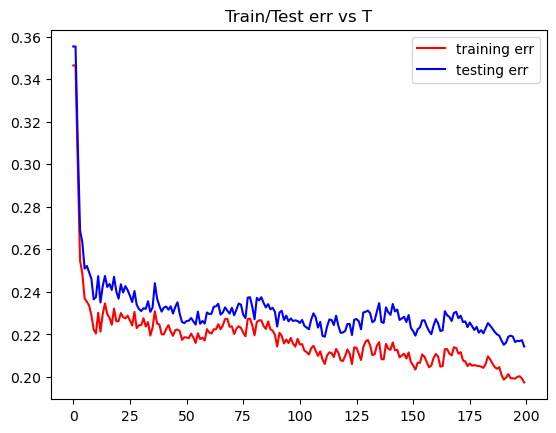

The test err when T = 1: [0.3554]
The test err when T = 200: [0.2143]


In [14]:
fig = plt.figure()
plt.plot(train_err,color = 'red',label = 'training err')
plt.plot(test_err,color='blue',label = 'testing err')
plt.title('Train/Test err vs T')
plt.legend()
plt.show()
fig.savefig('./plots/Adaboost.pdf')

print('The test err when T = 1:', test_err[0])
print('The test err when T = 200:', test_err[-1])

## Answer of part(i)
The test error when t = 1 is 35.54%.

The test error when t = 200 is 21.43%.

## Contributions

This project is finished by 2 persons, Robert Ozturk and Yiwen Zhang, equally.